In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt




## Loading Dataset
The dataset that we are going to use for this "Amazon" product review. The dataset consits of of total #346355 the documents contain positive and negative reviews regarding the product. further details regarding dataset can be found to be at http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Health_and_Personal_Care.json.gz  


In [31]:
df = pd.read_csv("Output.csv", sep='\t', error_bad_lines= False, nrows=1000)
# df = pd.read_csv("Output.csv", sep='\t', error_bad_lines= False)
df.shape

(1000, 10)

Making an additional column to decide "Positive or Nagative" review based ob the score

In [32]:
df['review_class'] = [1 if x > 3 else 0 for x in df.overall]
df.head(2)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,review_class
0,0,159985130X,"[1, 1]",5.0,This is a great little gadget to have around. ...,"01 5, 2011",ALC5GH8CAMAI7,AnnN,Handy little gadget,1294185600,1
1,1,159985130X,"[1, 1]",4.0,I would recommend this for a travel magnifier ...,"02 18, 2012",AHKSURW85PJUE,"AZ buyer ""AZ buyer""",Small & may need to encourage battery,1329523200,1


## Training and Testing Sets 
Like any other supervised machine learning problems, we need to divide out data into training and testing sets, to do so we used the train_test_split utility from the sklearn.model_selection library

### Finding TFID

Mulitplying the term frequency of a word by the inverse document frequency. The TF stands for "Term frequency" while IDF stand for "Invers Document Frequency" The ft-idf value increases proportionally to the number of documents in word appears in the document.

The term frequency is calculated as:

Term frequency = (Number of Occurrences of a word)/(Total words in the document)  

And the Inverse Document Frequency is calculated as:

IDF(word) = Log((Total number of documents)/(Number of documents containing the word))  


## Training Text Classification Model and Predicting Sentiment

We have divided our data into training and testing set. Now is the time to see real actio, we will use logisticRegression  from sklearn. The fit method of this class used to train the algorithm. we need to pass trainign and training target sets tho this method.
Finally, to predict the sentiment for the documents in our text set we can use predict()

x_train shape: (800,)
y_train shape: (800,)

x_test shape: (200,)
y_test shape: (200,)

Accuracy score: 0.89
 [[  0  22]
 [  0 178]]
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.89      1.00      0.94       178

   micro avg       0.89      0.89      0.89       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.79      0.89      0.84       200



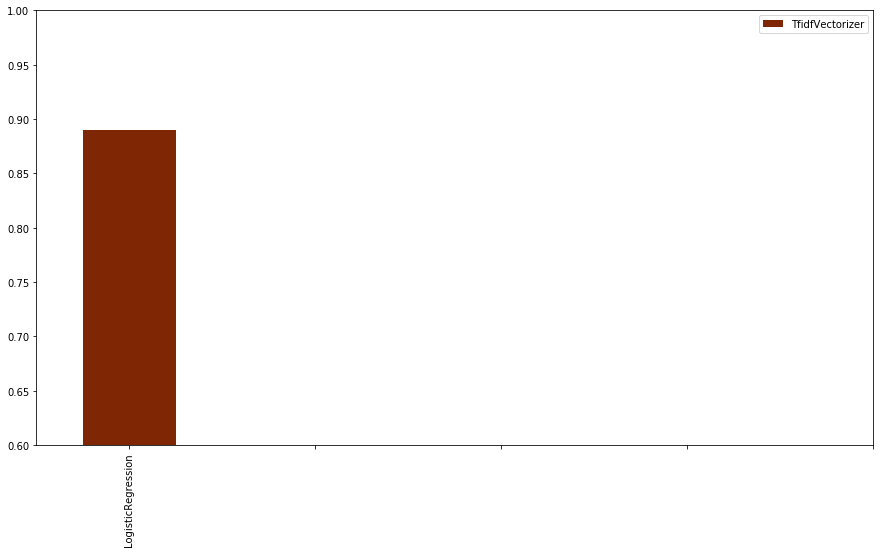

In [53]:
x_train, x_test, y_train, y_test = train_test_split(df.reviewText, df.review_class, test_size=0.2, random_state=0)
 
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')


# Convert a collection of raw documents to a matrix
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')
# Learn vocabulary and idf from training set.
x_train_tv = vectorizer.fit(x_train.values.astype('U'))
# Learn vocabulary and idf, return term-document matrix. Uses the vocabulary and document frequencies (df) learned by fit.
x_train_tv = vectorizer.transform(x_train.values.astype('U'))
x_test_tv = vectorizer.transform(x_test.values.astype('U'))

# training algorithm 
# model = GaussianNB()
model = LogisticRegression()
# model = svm.SVC()
# model = LinearSVC() # 0.87
# model = tree.DecisionTreeClassifier()
# model = RandomForestClassifier() # 0.82
# model = GradientBoostingClassifier() # 0.83
# Fit the model according to the given training data.
# Training vector, where n_samples is the number of samples and n_features is the number of features.
model.fit(x_train_tv,y_train)
# Predict class labels for samples in X.
y_predict = model.predict(x_test_tv)
# Accuracy classification score
cv_score = accuracy_score(y_test,y_predict)
# Plotting the graph
results = {'Model':['LogisticRegression'],
           'TfidfVectorizer':[cv_score]
         }
 
    
results_df = pd.DataFrame(results)
results_df.plot.bar(ylim=(0.60,1.0), figsize=(15,8), align='center', colormap="Oranges_r")
plt.xticks(np.arange(5), results_df.Model)

# printing the out of the score
print('Accuracy score:', cv_score) 





## Plotting the Graph

We used sklearn library to plot score graph against the algorithm


## Report
#### Consufion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier")
with two rows and two columns that report the number of **false positive** and **false negative**

Each row of the Matrix represents the instances in a predicted class while each column represents the instances in an actual class

 [[  0  22]
 [  0 178]]


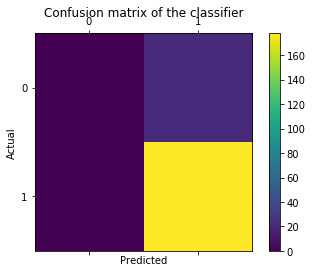

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.89      1.00      0.94       178

   micro avg       0.89      0.89      0.89       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.79      0.89      0.84       200



In [76]:
cm = confusion_matrix(y_test, y_predict)
print('',cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [83]:

print('', classification_report(y_test, y_predict))

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.89      1.00      0.94       178

   micro avg       0.89      0.89      0.89       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.79      0.89      0.84       200



Nos let's set up our neural network model considering how complicated LSTM recurrecnt neurral network in under the hood, its really amaxing how easy this it to do with Keras.

We will start with Embedding layer- this just a step that converts the input data into dense vectors of fixed soze that's nbetter suited for neural network. 

Next we just have to set up LSTM layer for the RSS itself. It's tjat easy. We specify 128 to match the output size of the Embedding layer, and dropout items to avoid overfitting, which RNN's are particular prone to.

Finally, we just need to boild it donw to single neuron with sigmoid activation function to choose our binary sentiment classification of 0 or 1

In [84]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM


model = Sequential()
model.add(Embedding(1000, 128))
model.add(LSTM(128, dropout = 0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


As this is binary classification problem, we'll use binary_crossentropy loss function adn the Adam optimizer is usually good choice(feel fre to try others)

In [85]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Now we will actually train model. RNN's like CNN's, are very resource heavy. Keepi g the batch size relatively small is the key enabling this run on your PC at all. In the real word of course. you'd be taking advantange of GPU's installed across many computers on cluster to make this scale a lot better.

## Warning

This will take a very long time to run, even on fast PC. Don't execute the next blocks unless you're prepared to tie up computer for an housr or more

In [ ]:
model.fit(x_train_tv, y_train, batch_size=32, epochs=15, verbose=2, validation_data=(x_test, y_test))

Train on 800 samples, validate on 200 samples
Epoch 1/15


In [ ]:
score, acc = model.evaluate(x_test, y_test, batch_size=32, verbose=2)

print('Test score:', score)
print('Test accuracy', acc)

## Testing

In [23]:
# read text data from file
df = pd.read_csv("test-data-filtered.csv")

In [24]:
# transformed 
test_vector = vectorizer.transform(df.reviewText.values.astype('U'))
actualPredict = model.predict(test_vector)
actualPredict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])